# **Data Visualisation**
Since we used different datasets for different kinds of analyses in our project, data visualisation will be conducted for the 2 datasets used. The wo datasets are as follows:
> 1. merged200k.csv
> 2. merged20k.csv

#### **Import Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler

---

# **Dataset 1: merged200k.csv**
This dataset was used for the analysis of <u>***continuous numerical*** audio features</u> and <u>track popularity</u>. Audio features were chosen as the predictors as we felt that it could reveal interesting data on people's subconscious preferences for songs sonically.

Track popularity was chosen as the response as it is a variable that reflects how much people like the song.

> **Predictors:** Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo\
> **Response:** Track Popularity

In [2]:
merged200k = pd.read_csv("datasets/merged200k.csv")
merged200k

,Track Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,Artist Genres,track_id
0,act ii: date @ 8 (feat. Drake) - remix,0.550,0.545,0.0,-9.304,1.0,0.1630,0.3180,0.000000,0.0608,0.412,102.469,4.0,87,NaN,3QS9ZCtoSCJhmaJ7QNXSAS
1,LEAP!,0.892,0.585,11.0,-7.269,1.0,0.1020,0.1460,0.000004,0.0881,0.244,104.011,4.0,38,NaN,3vl2uH4D2QItFFhzz5L06g
2,Overdrive,0.568,0.788,5.0,-6.280,1.0,0.0377,0.0101,0.000000,0.1410,0.460,104.959,4.0,66,"bedroom pop, pop, pov: indie",3QyoC6OvQUmpQwQZ18iaTs
3,Raise y_our glass,0.567,0.503,8.0,-6.119,1.0,0.1240,0.5810,0.000000,0.3690,0.184,72.798,4.0,60,NaN,7j1vFohEm1lbsctYY9gyGd
4,In My Mind,0.668,0.392,2.0,-12.178,0.0,0.0585,0.7890,0.002750,0.3450,0.323,135.936,3.0,73,gen z singer-songwriter,2W779g2UrRZtVdf3FcEOO1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191390,Quickly (feat. Brandy),0.736,0.701,A#,-4.345,Minor,0.1000,0.2310,0.000000,0.2030,0.770,99.991,4/4,39,Soul,1U0OMWvR89Cm20vCNar50f
191391,P.O.P.,0.802,0.516,D,-9.014,Major,0.2130,0.1040,0.000485,0.1050,0.482,175.666,4/4,43,Soul,2gGqKJWfWbToha2YmDxnnj
191392,I'll Take Care Of You - Single Version,0.423,0.337,A#,-13.092,Minor,0.0436,0.5660,0.000000,0.2760,0.497,80.023,4/4,32,Soul,2iZf3EUedz9MPqbAvXdpdA
191393,Burning Fire,0.785,0.683,E,-6.944,Minor,0.0337,0.0329,0.000880,0.2370,0.969,113.830,4/4,38,Soul,1qWZdkBl4UVPj9lK6HuuFM


## **Cleaning Dataset**

### **Track Popularity**
There are a huge number of tracks that have a track popularity of 0, as seen below.

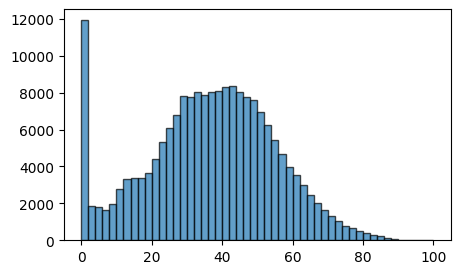

In [3]:
plt.figure(figsize=(5, 3))
plt.hist(merged200k['Track Popularity'], bins=50, alpha=0.7, edgecolor='black')
plt.show()

In [4]:
merged200k.loc[merged200k['Track Popularity']==0].head(10)

,Track Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,Artist Genres,track_id
32,Take Me To Church,0.566,0.664,4.0,-5.303,0.0,0.0464,0.634000,0.000000,0.1160,0.437,128.945,4.0,0,"irish singer-songwriter, modern rock, pov: indie",7dS5EaCoMnN7DzlpT6aRn2
39,The Heart Wants What It Wants,0.616,0.789,7.0,-4.874,0.0,0.0377,0.053000,0.000000,0.1420,0.621,83.066,4.0,0,"pop, post-teen pop",2jcPoPin36hyNRSi4ZsqeB
41,Bumpy Ride,0.709,0.854,0.0,-4.447,0.0,0.0399,0.047000,0.000000,0.0724,0.826,105.074,4.0,0,NaN,0tBRo4P60DgKmg4jt48upm
42,Danza Kuduro (feat. Don Omar),0.706,0.890,0.0,-6.575,1.0,0.0847,0.085500,0.000000,0.0465,0.896,130.051,4.0,0,reggaeton,1kAZhbcsXqfUjnVeqPywn2
45,Girlfriend,0.560,0.959,7.0,-2.433,1.0,0.1020,0.000738,0.000206,0.2090,0.670,163.983,4.0,0,"canadian pop, candy pop, dance pop, pop",5HbCnVLXRyZVxnreOPgJCK
46,Baby,0.463,0.854,8.0,-5.386,1.0,0.3200,0.042800,0.000000,0.0922,0.567,65.038,4.0,0,"canadian pop, pop",4NFhtFE68cXUrfbne8JE2c
48,Coconut Tree,0.687,0.855,7.0,-5.341,0.0,0.0416,0.048600,0.000000,0.2330,0.647,130.029,4.0,0,NaN,5L9THbmMKB6ZlHlMgzaXHf
49,One Less Lonely Girl,0.580,0.750,4.0,-4.421,1.0,0.1940,0.159000,0.000000,0.2740,0.728,86.938,4.0,0,"canadian pop, pop",7qUcqYzOtfZe65bednDxmz
51,Don't You Worry Child - Radio Edit,0.608,0.828,2.0,-3.597,1.0,0.0510,0.125000,0.000000,0.1130,0.484,128.919,4.0,0,"edm, pop dance, progressive electro house",5DcPOPPUnNhyPYbTi2aWjR
54,Radioactive,0.473,0.777,9.0,-3.698,1.0,0.0590,0.119000,0.000079,0.6710,0.210,136.249,4.0,0,"modern rock, pop, rock",6Ep6BzIOB9tz3P4sWqiiAB


 On further observation, there are definitely some songs that by general knowledge are definitely not unpopular! This is perhaps a limitation where Spotify did not update the song's track popularity, and thus assigned a value of 0 by default. Unfortunately, we will have to remove these tracks.

In [5]:
merged200k.drop(merged200k.loc[merged200k['Track Popularity']==0].index, inplace=True)

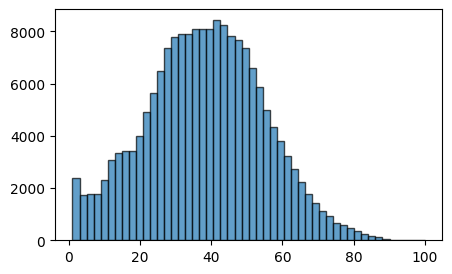

In [6]:
plt.figure(figsize=(5, 3))
plt.hist(merged200k['Track Popularity'], bins=50, alpha=0.7, edgecolor='black')
plt.show()

Much better! This verifies that the tracks with popularity of zero are removed from the dataset.

## **Visualisation of each variable**

In [7]:
# Retrieve relevant variables -- audio features and track popularity
songdata1 = pd.DataFrame(merged200k.select_dtypes(include=['int64','float64']))
songdata1

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.550,0.545,-9.304,0.1630,0.3180,0.000000,0.0608,0.412,102.469,87
1,0.892,0.585,-7.269,0.1020,0.1460,0.000004,0.0881,0.244,104.011,38
2,0.568,0.788,-6.280,0.0377,0.0101,0.000000,0.1410,0.460,104.959,66
3,0.567,0.503,-6.119,0.1240,0.5810,0.000000,0.3690,0.184,72.798,60
4,0.668,0.392,-12.178,0.0585,0.7890,0.002750,0.3450,0.323,135.936,73
...,...,...,...,...,...,...,...,...,...,...
191390,0.736,0.701,-4.345,0.1000,0.2310,0.000000,0.2030,0.770,99.991,39
191391,0.802,0.516,-9.014,0.2130,0.1040,0.000485,0.1050,0.482,175.666,43
191392,0.423,0.337,-13.092,0.0436,0.5660,0.000000,0.2760,0.497,80.023,32
191393,0.785,0.683,-6.944,0.0337,0.0329,0.000880,0.2370,0.969,113.830,38


In [8]:
songdata1.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
count,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000,180881.000000
mean,0.543932,0.569830,-9.842708,0.124481,0.386427,0.163719,0.223169,0.454047,117.512099,38.103427
std,0.188678,0.272141,6.268729,0.200279,0.361621,0.316559,0.209153,0.266312,31.155544,16.694550
min,0.000000,0.000020,-52.457000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,1.000000
25%,0.420000,0.370000,-12.337000,0.036600,0.040600,0.000000,0.097400,0.227000,92.446000,27.000000
50%,0.561000,0.610000,-7.909000,0.049100,0.256000,0.000056,0.130000,0.444000,115.527000,38.000000
75%,0.684000,0.797000,-5.505000,0.099500,0.763000,0.063500,0.276000,0.668000,138.941000,50.000000
max,0.989000,1.000000,3.744000,0.967000,0.996000,0.999000,1.000000,1.000000,242.903000,100.000000


## **Distribution of Response (Track Popularity)**

In [9]:
songdata1["Track Popularity"].describe()

count    180881.000000
mean         38.103427
std          16.694550
min           1.000000
25%          27.000000
50%          38.000000
75%          50.000000
max         100.000000
Name: Track Popularity, dtype: float64

Text(0.5, 0.98, 'Distribution of Track Popularity for merged200k')

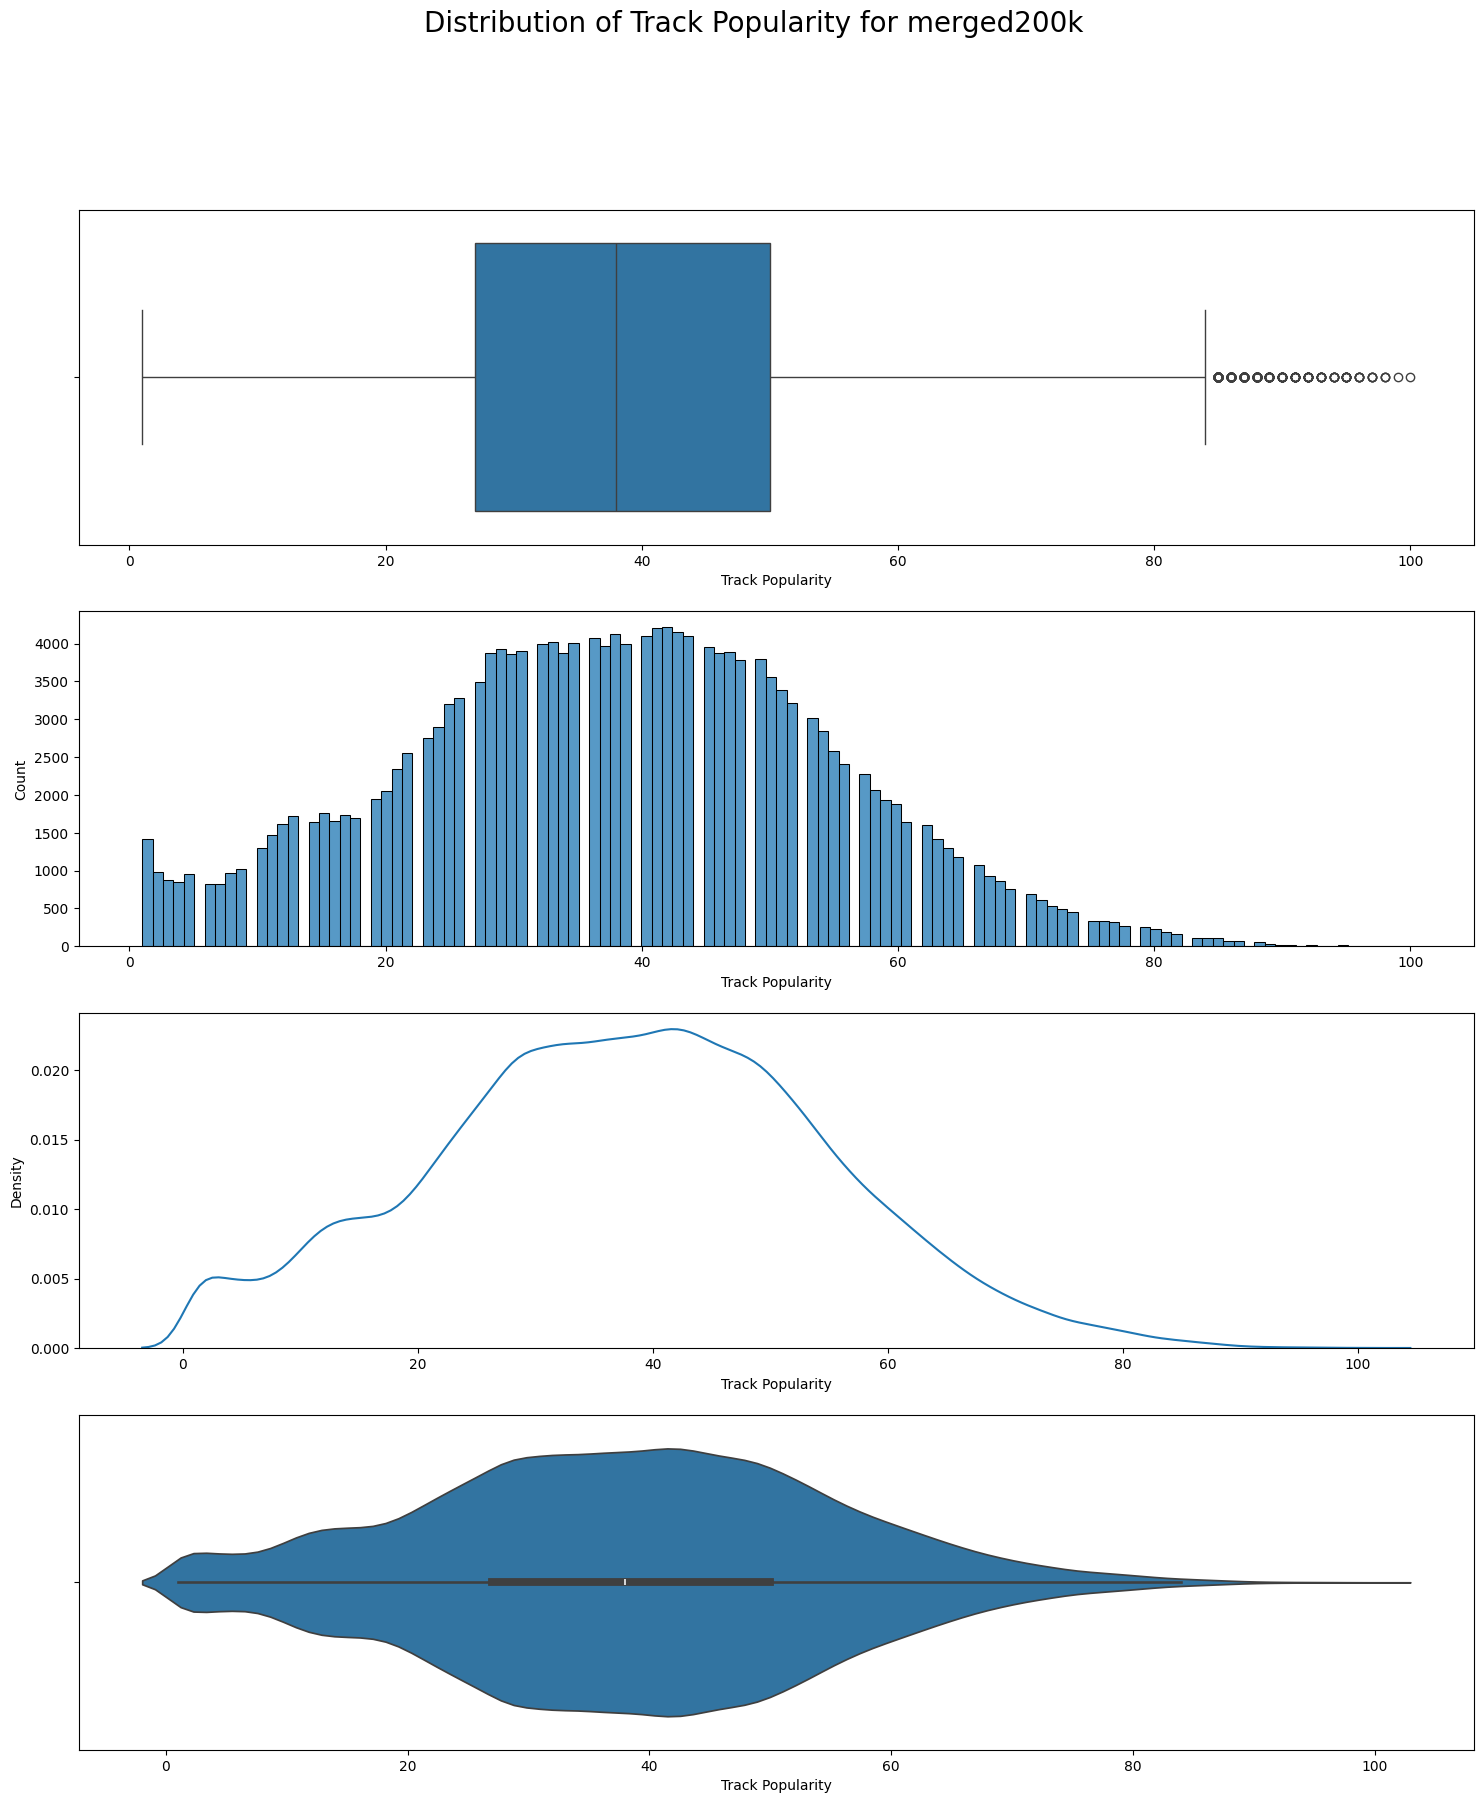

In [10]:
# Plot distribution of Track Popularity
f, axes = plt.subplots(4, figsize=(18,20))
box_tp = sb.boxplot(data=songdata1["Track Popularity"], orient="h", ax=axes[0])
histo_tp = sb.histplot(data=songdata1["Track Popularity"], ax=axes[1])
kde_tp = sb.kdeplot(data=songdata1["Track Popularity"], ax=axes[2])
violin_tp = sb.violinplot(data=songdata1["Track Popularity"], orient="h", ax=axes[3])
f.suptitle("Distribution of Track Popularity for merged200k", fontsize=20)

Even after removing the excessive number of invalid 'track popularity = 0' tracks, the distribution is still skewed to the left as seen in the plots above. There are too few tracks with a high 'track popularity' value.

Thus, we conducted resampling on 'merged200k.csv' in order to balance out the distribution.

The process of data resampling is explained in our <u>***'data-resampling.ipynb'***</u> notebook.

## **Distribution of Predictors**

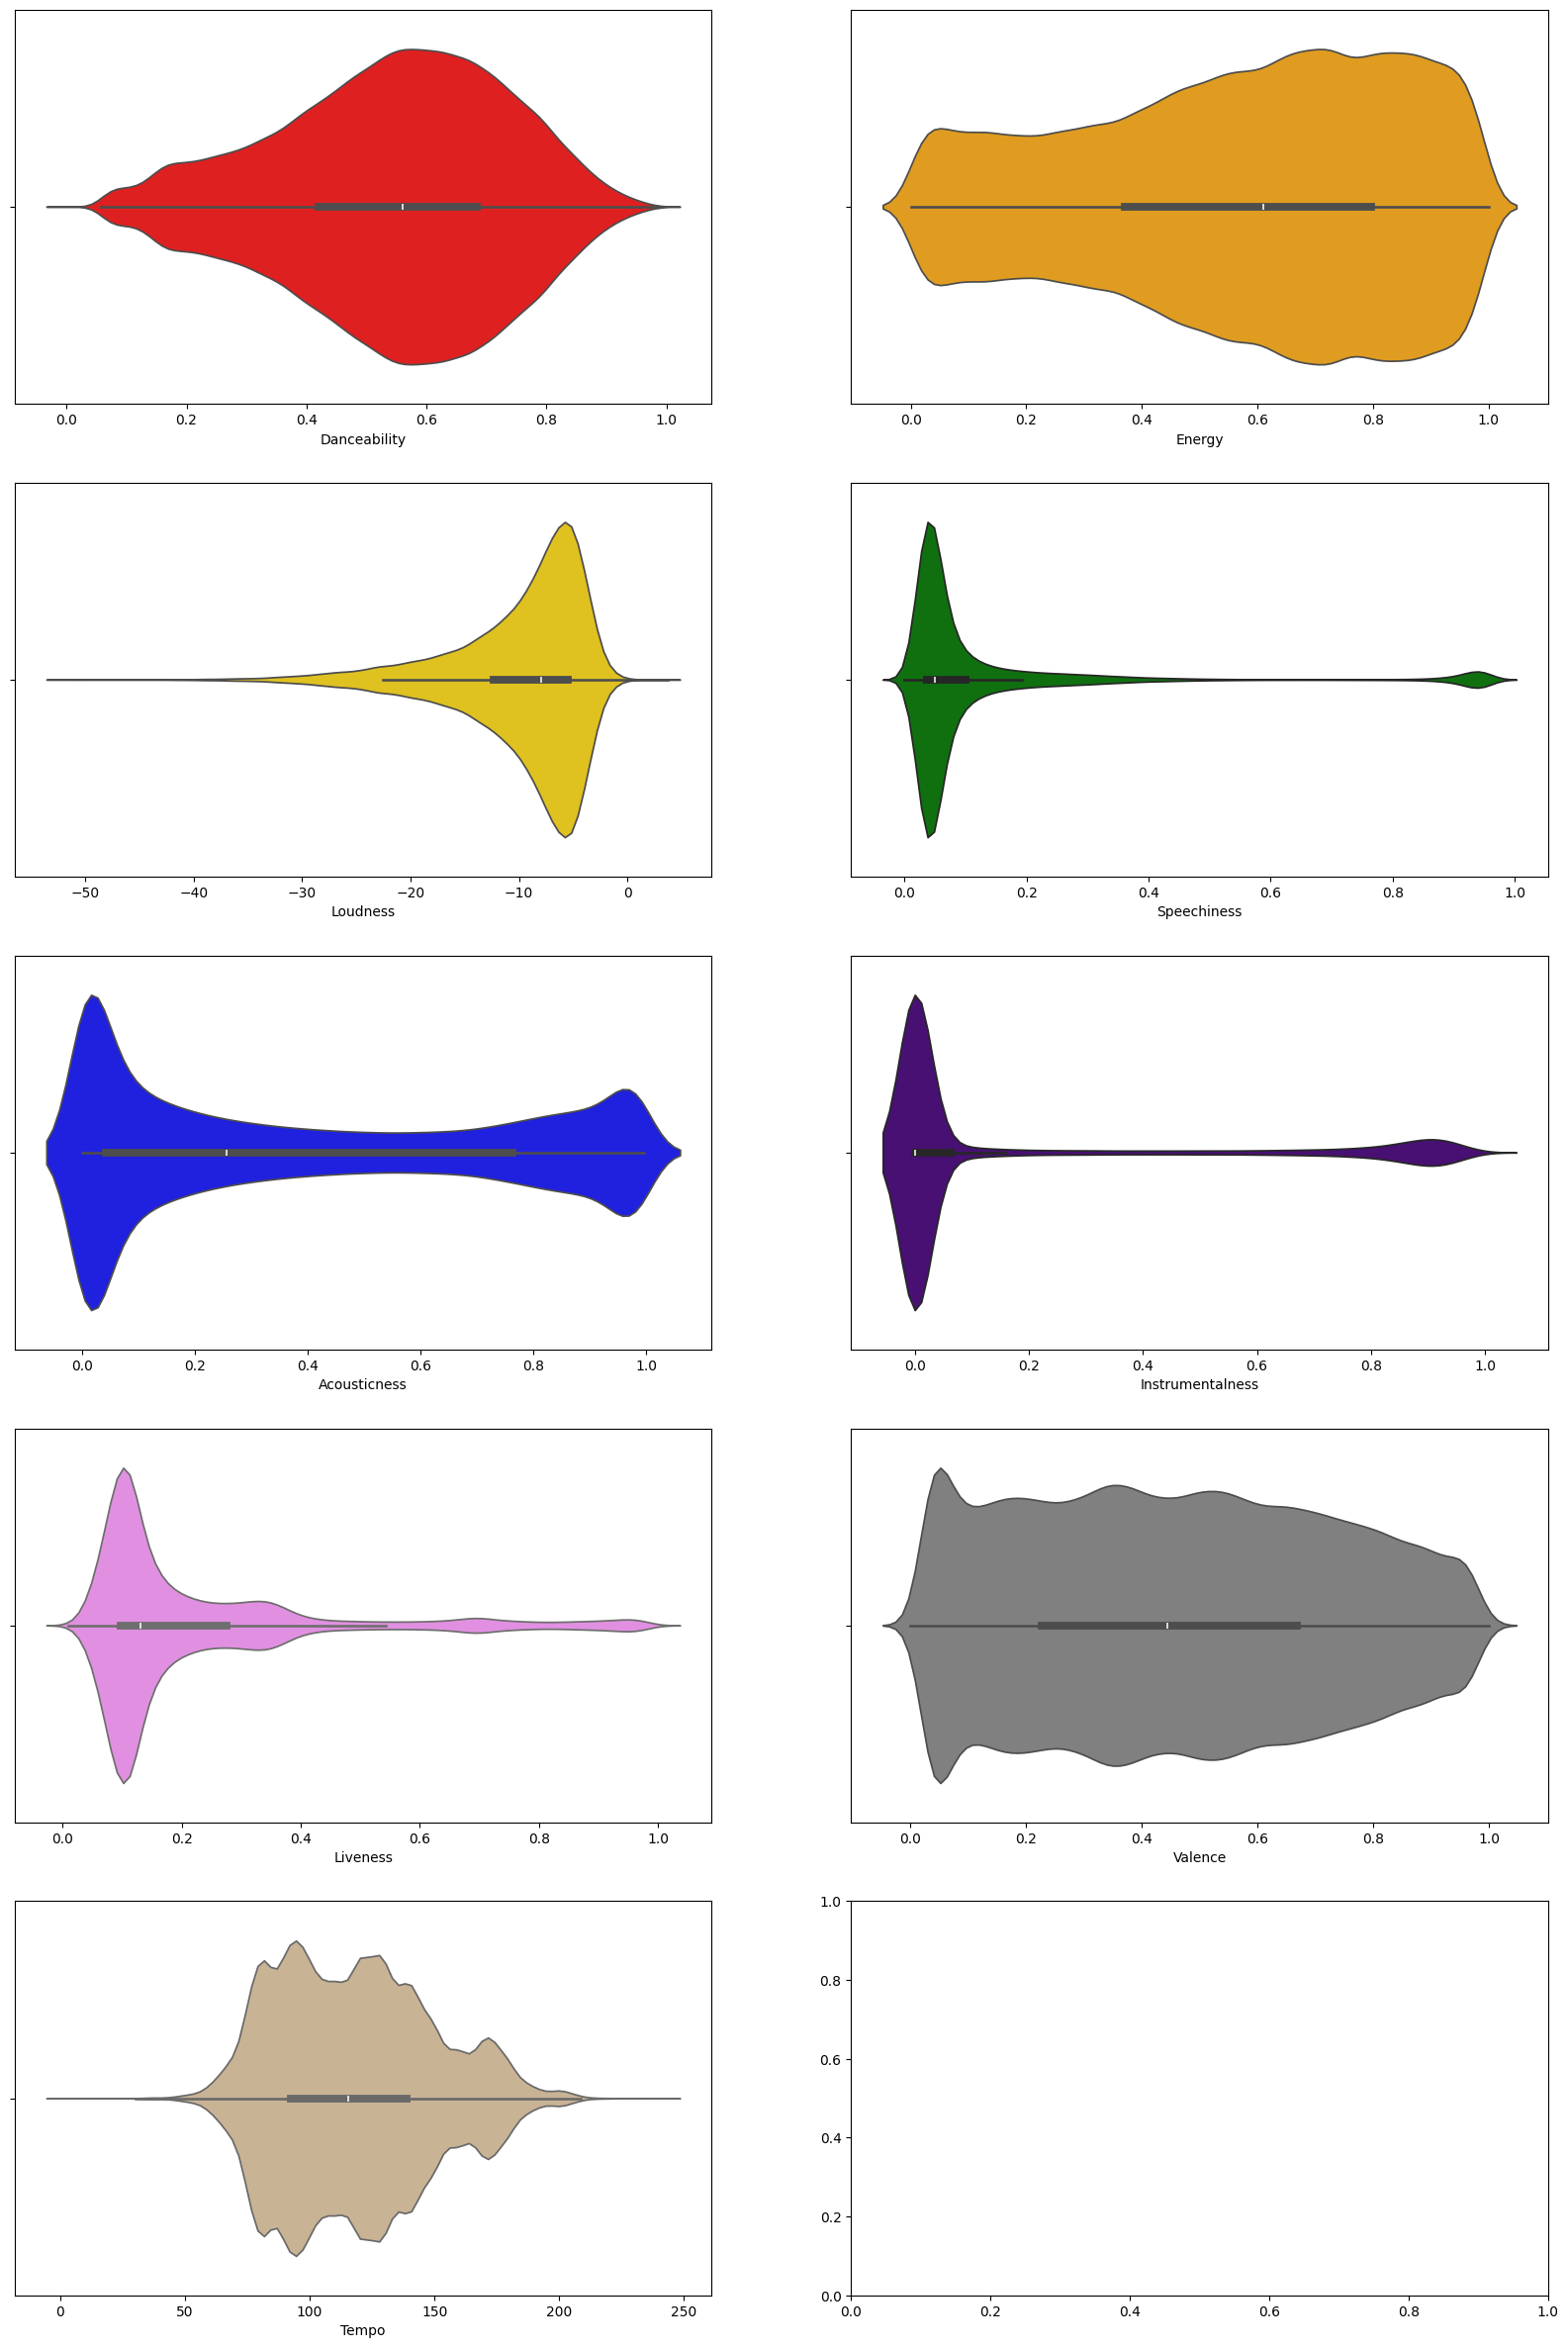

In [11]:
# Plot the distribution of predictors
palette = ["red","orange","gold","green","blue", "indigo", "violet", "grey", "tan"]
f, axes = plt.subplots(5,2,figsize=(20,30))
total = 0
row = 0

audio_features = [c for c in songdata1.columns if c != "Track Popularity"]

for var in audio_features:
    if total % 2 == 0:
        col = 0
    else:
        col = 1
    
    vp = sb.violinplot(data=songdata1[var], orient='h', ax=axes[row,col], color=palette[total])
    vp.set_xlabel(var, fontsize=10)
    total += 1

    if total % 2 == 0:
        row += 1


As seen from the distribution plots above, a few of the variables are <u>skewed to one end</u> (i.e. Loudness, Instrumentalness, Speechiness, Acousticness, Liveness)

However, some of the variables have quite a <u>centered distribution</u> (i.e. Danceability, Energy, Valence, Tempo)

## **Relation of Predictors with Response (Audio Features, Track Popularity)**

In [12]:
songdata1.corr()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
Danceability,1.000000,0.373078,0.465822,0.124948,-0.387728,-0.375318,-0.027960,0.580842,0.039938,0.254320
Energy,0.373078,1.000000,0.822638,0.160912,-0.726783,-0.397983,0.207268,0.463801,0.244047,0.192765
Loudness,0.465822,0.822638,1.000000,-0.002349,-0.692607,-0.512997,0.053468,0.431488,0.247333,0.301582
Speechiness,0.124948,0.160912,-0.002349,1.000000,0.178128,-0.183203,0.557366,0.013008,-0.101021,-0.180070
Acousticness,-0.387728,-0.726783,-0.692607,0.178128,1.000000,0.310320,0.082272,-0.361284,-0.262077,-0.323746
Instrumentalness,-0.375318,-0.397983,-0.512997,-0.183203,0.310320,1.000000,-0.155980,-0.335637,-0.110871,-0.158841
Liveness,-0.027960,0.207268,0.053468,0.557366,0.082272,-0.155980,1.000000,0.007726,-0.060972,-0.184305
Valence,0.580842,0.463801,0.431488,0.013008,-0.361284,-0.335637,0.007726,1.000000,0.154573,0.083793
Tempo,0.039938,0.244047,0.247333,-0.101021,-0.262077,-0.110871,-0.060972,0.154573,1.000000,0.086146
Track Popularity,0.254320,0.192765,0.301582,-0.180070,-0.323746,-0.158841,-0.184305,0.083793,0.086146,1.000000


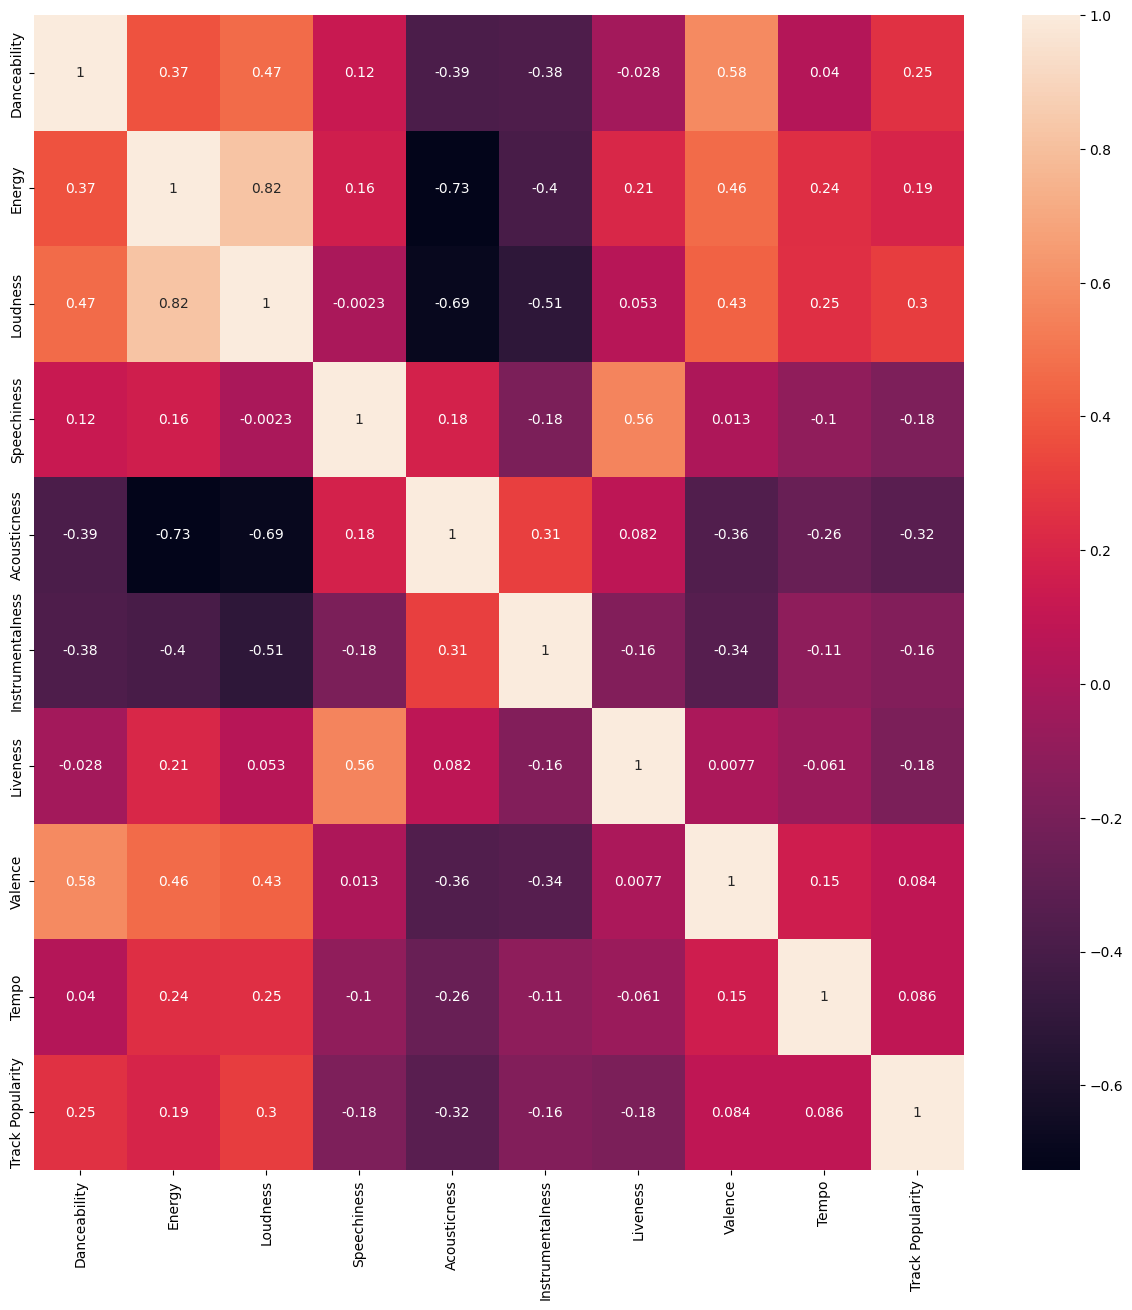

In [13]:
plt.figure(figsize=(15,15))
sb.heatmap(songdata1.corr(), annot=True)
plt.show()

From the heatmap, the correlation between track popularity and the audio features have a low correlation. The magnitudes of all of their correlation values with track popularity are below 0.4, with acousticness having the highest at 0.32.

This shows that all the audio featuress have a low linear correlation with track popularity, and thus a poor linear relationship. However, it is still possible that they may have a non-linear relationship. It is thus important to explore non-linear models as well.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


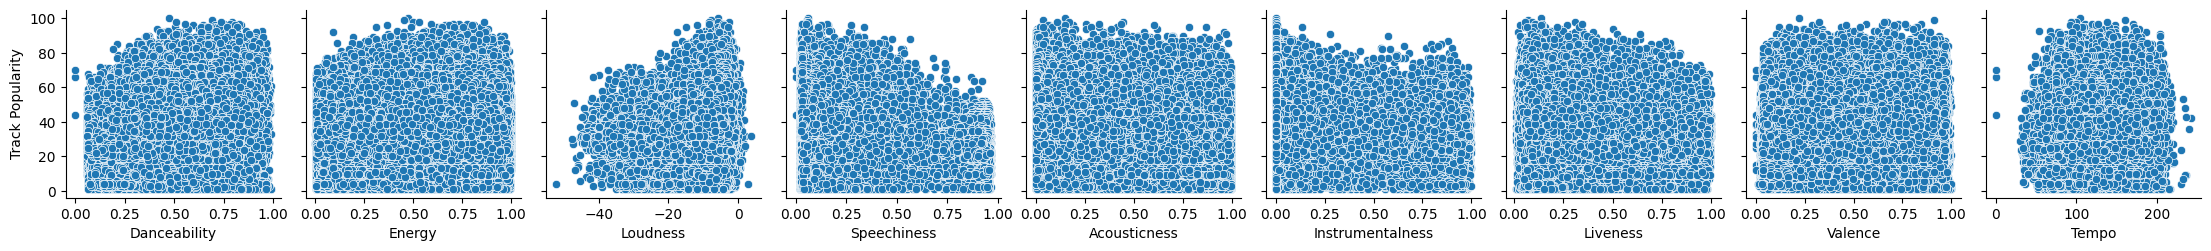

In [14]:
sb.pairplot(data=songdata1,
            y_vars=["Track Popularity"],
            x_vars=audio_features)

---

# <u>**Dataset 2: merged20k.csv**</u>
This dataset was used for the analysis of <u>artist genre</u>, <u>artist popularity</u>, <u>decade released</u>. We were unable to use merged200k.csv for this analysis as merged200k.csv does not contain artist popularity and decade released.

We felt that artist genre would be an important factor in influencing how popular an artist is. An artist that produces songs of a genre that are well-liked by the general public would be more likely to be popular.

Decade released was also chosen as a predictor because it can be used as an indicator of which decade that artist is active in, and since preferences of genres tend to change over time, a relationship can be established between artist genres and decade released.

Artist popularity was chosen as the response as it is a variable that reflects how much people like an artist.

> **Predictors:** Artist Genre, Album Release Decade\
> **Response:** Artist Popularity

## **Cleaning Dataset**

In [15]:
merged20k = pd.read_csv("datasets/merged20k.csv")
merged20k

,Track Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,...,Tempo,Time Signature,Track URI,Track Popularity,Artist Popularity,Artist URI,Album Release Date,Artist Genres,Release Year,Decade Released
0,act ii: date @ 8 (feat. Drake) - remix,0.550,0.545,0.0,-9.304,1.0,0.1630,0.318000,0.000000,0.0608,...,102.469,4.0,spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS,87,74,spotify:artist:5fi7lIgJGH3RgUpJYcffQ7,2024-03-08,NaN,2024,2020s
1,LEAP!,0.892,0.585,11.0,-7.269,1.0,0.1020,0.146000,0.000004,0.0881,...,104.011,4.0,spotify:track:3vl2uH4D2QItFFhzz5L06g,38,49,spotify:artist:20WmX0l9JgOpehDOAXY6iO,2020-10-02,NaN,2020,2020s
2,Overdrive,0.568,0.788,5.0,-6.280,1.0,0.0377,0.010100,0.000000,0.1410,...,104.959,4.0,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,66,81,spotify:artist:4Uc8Dsxct0oMqx0P6i60ea,2021-02-19,"bedroom pop, pop, pov: indie",2021,2020s
3,Raise y_our glass,0.567,0.503,8.0,-6.119,1.0,0.1240,0.581000,0.000000,0.3690,...,72.798,4.0,spotify:track:7j1vFohEm1lbsctYY9gyGd,60,69,spotify:artist:13yWtUnz63q5VIs5SwoMhy,2022-08-09,NaN,2022,2020s
4,In My Mind,0.668,0.392,2.0,-12.178,0.0,0.0585,0.789000,0.002750,0.3450,...,135.936,3.0,spotify:track:2W779g2UrRZtVdf3FcEOO1,73,62,spotify:artist:4pfy05cNNTacuOQ6SiSu4v,2021-08-20,gen z singer-songwriter,2021,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,Get A Life,0.710,0.952,11.0,-6.286,0.0,0.0557,0.023200,0.000121,0.2860,...,137.976,4.0,spotify:track:4gFL3QgCRx0o1B5KjlkCR1,22,43,spotify:artist:0zg9mF9dX2knvdTKnL22T1,2004-03-26,"big beat,breakbeat",2004,2000s
18478,Kernkraft 400,0.798,0.430,8.0,-7.839,0.0,0.0868,0.005500,0.901000,0.1460,...,140.064,4.0,spotify:track:6PUzxtIHkv346yP89NzP9X,57,48,spotify:artist:7vFpNLbCXbBFs4kFBUlkSl,2006-03-07,german techno,2006,2000s
18479,Never Say Never - Radio Edit,0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,...,130.978,4.0,spotify:track:5k9QrzJFDAp5cXVdzAi02f,17,22,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,2005-10-24,"australian dance,melbourne bounce",2005,2000s
18480,Groovejet (If This Ain't Love) [feat. Sophie E...,0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,...,123.037,4.0,spotify:track:5ydeCNaWDmFbu4zl0roPAH,62,44,spotify:artist:4bmymFwDu9zLCiTRUmrewb,2000-08-14,"disco house,vocal house,dance pop,europop,new ...",2000,2000s


As observed, there are some rows with empty values in the column of "Artist Genres". We will need to remove these rows as they will not be useful in our analysis.

In [16]:
#Dropping all rows where "Artist Genres" is empty
merged20k = merged20k.dropna(subset=['Artist Genres']) 
merged20k

,Track Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,...,Tempo,Time Signature,Track URI,Track Popularity,Artist Popularity,Artist URI,Album Release Date,Artist Genres,Release Year,Decade Released
2,Overdrive,0.568,0.788,5.0,-6.280,1.0,0.0377,0.010100,0.000000,0.1410,...,104.959,4.0,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,66,81,spotify:artist:4Uc8Dsxct0oMqx0P6i60ea,2021-02-19,"bedroom pop, pop, pov: indie",2021,2020s
4,In My Mind,0.668,0.392,2.0,-12.178,0.0,0.0585,0.789000,0.002750,0.3450,...,135.936,3.0,spotify:track:2W779g2UrRZtVdf3FcEOO1,73,62,spotify:artist:4pfy05cNNTacuOQ6SiSu4v,2021-08-20,gen z singer-songwriter,2021,2020s
6,deja vu,0.442,0.612,2.0,-7.222,1.0,0.1120,0.584000,0.000006,0.3700,...,180.917,4.0,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,87,90,spotify:artist:1McMsnEElThX1knmY4oliG,2021-05-21,pop,2021,2020s
7,poster boy,0.539,0.709,1.0,-6.687,1.0,0.0321,0.154000,0.066600,0.1610,...,163.944,4.0,spotify:track:2TaCG1ArsxRsUyZhqy5jei,51,62,spotify:artist:4pfy05cNNTacuOQ6SiSu4v,2023-04-14,gen z singer-songwriter,2023,2020s
9,Seven (feat. Latto),0.802,0.832,11.0,-4.107,1.0,0.0434,0.311000,0.000000,0.0815,...,124.997,4.0,spotify:track:7x9aauaA9cu6tyfpHnqDLo,84,86,spotify:artist:6HaGTQPmzraVmaVxvz6EUc,2023-07-14,k-pop,2023,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,Get A Life,0.710,0.952,11.0,-6.286,0.0,0.0557,0.023200,0.000121,0.2860,...,137.976,4.0,spotify:track:4gFL3QgCRx0o1B5KjlkCR1,22,43,spotify:artist:0zg9mF9dX2knvdTKnL22T1,2004-03-26,"big beat,breakbeat",2004,2000s
18478,Kernkraft 400,0.798,0.430,8.0,-7.839,0.0,0.0868,0.005500,0.901000,0.1460,...,140.064,4.0,spotify:track:6PUzxtIHkv346yP89NzP9X,57,48,spotify:artist:7vFpNLbCXbBFs4kFBUlkSl,2006-03-07,german techno,2006,2000s
18479,Never Say Never - Radio Edit,0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,...,130.978,4.0,spotify:track:5k9QrzJFDAp5cXVdzAi02f,17,22,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,2005-10-24,"australian dance,melbourne bounce",2005,2000s
18480,Groovejet (If This Ain't Love) [feat. Sophie E...,0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,...,123.037,4.0,spotify:track:5ydeCNaWDmFbu4zl0roPAH,62,44,spotify:artist:4bmymFwDu9zLCiTRUmrewb,2000-08-14,"disco house,vocal house,dance pop,europop,new ...",2000,2000s


We will now remove any duplicate artist URIs.

In [17]:
# Remove duplicate artist URIs
merged20k.drop_duplicates(subset=["Artist URI"], inplace=True, keep='first') 
merged20k.shape

/var/folders/fz/fh5c1mt952s8gfzlg27lyp9c0000gn/T/ipykernel_85947/557136014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged20k.drop_duplicates(subset=["Artist URI"], inplace=True, keep='first')


(5027, 21)

Now that we have our cleaned dataset, we can move on to the actual data visualisation. We can now retrieve the specific columns we need for this analysis.

In [18]:
songdata2 = pd.DataFrame(merged20k[["Artist Genres", "Artist URI", "Artist Popularity", "Decade Released"]])
songdata2

,Artist Genres,Artist URI,Artist Popularity,Decade Released
2,"bedroom pop, pop, pov: indie",spotify:artist:4Uc8Dsxct0oMqx0P6i60ea,81,2020s
4,gen z singer-songwriter,spotify:artist:4pfy05cNNTacuOQ6SiSu4v,62,2020s
6,pop,spotify:artist:1McMsnEElThX1knmY4oliG,90,2020s
9,k-pop,spotify:artist:6HaGTQPmzraVmaVxvz6EUc,86,2020s
10,"bedroom pop, bubblegrunge, indie pop, pov: indie",spotify:artist:35l9BRT7MXmM8bv2WDQiyB,77,2020s
...,...,...,...,...
18452,"pop rock,power pop",spotify:artist:1pgtr4nhBQjp9oCUBPyYWh,58,2000s
18460,"american folk revival,folk",spotify:artist:3qtcbDvdIgQOXkPbtRvBaQ,39,1990s
18476,"house,breaks,experimental house",spotify:artist:4XC335ouK6pXyq4QiIb8bP,63,2020s
18478,german techno,spotify:artist:7vFpNLbCXbBFs4kFBUlkSl,48,2000s


## **Visualisation of each variable**

## **Distribution of Response (Artist Popularity)**

In [19]:
songdata2["Artist Popularity"].describe()

count    5027.000000
mean       52.520589
std        16.407676
min         0.000000
25%        42.000000
50%        54.000000
75%        64.000000
max       100.000000
Name: Artist Popularity, dtype: float64

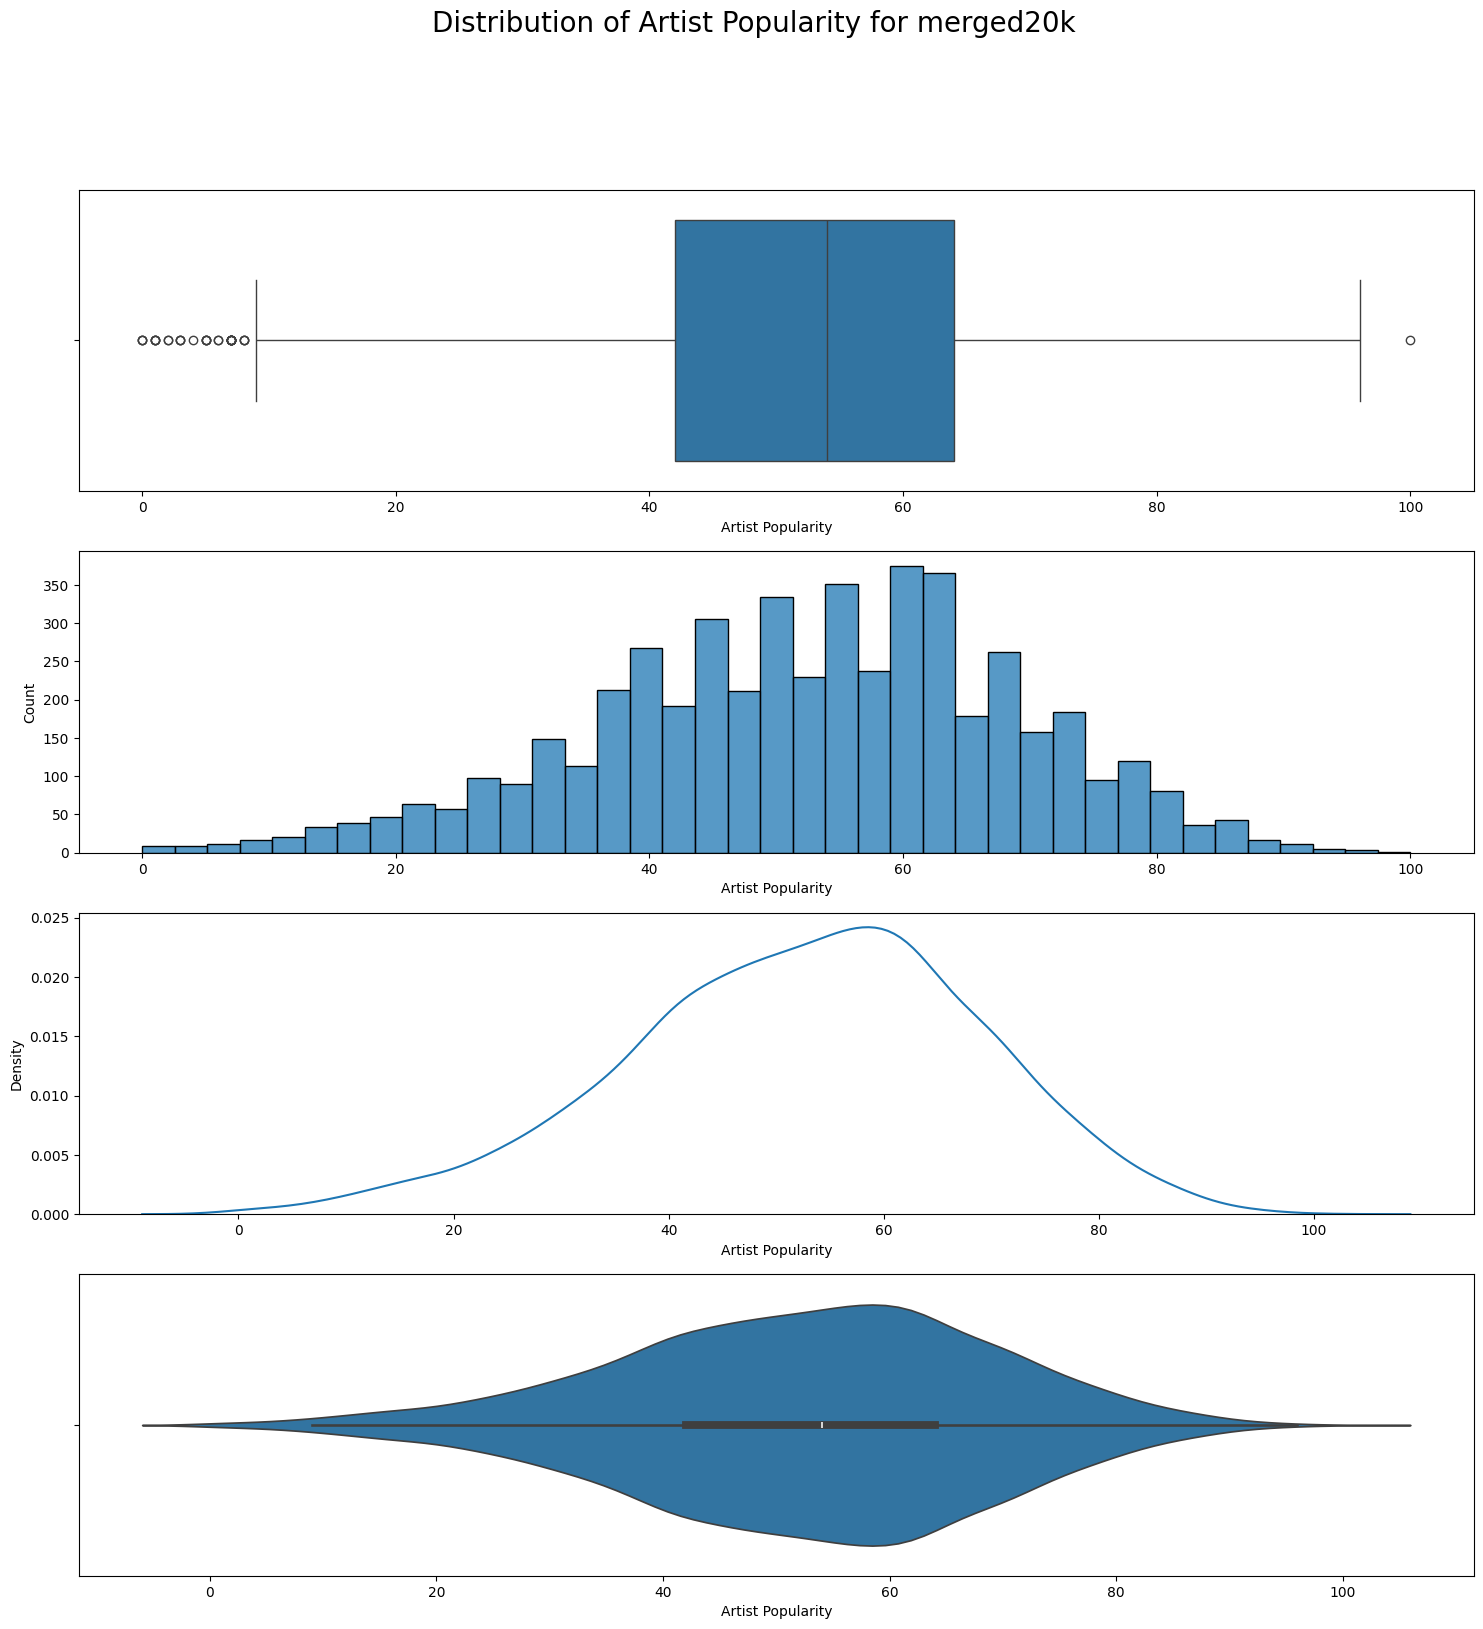

In [20]:
# Plot distribution of Artist Popularity
f, axes = plt.subplots(4, figsize=(18,18))
plt.suptitle("Distribution of Artist Popularity for merged20k", fontsize=20)
box_tp = sb.boxplot(data=songdata2["Artist Popularity"], orient="h", ax=axes[0])
histo_tp = sb.histplot(data=songdata2["Artist Popularity"], ax=axes[1])
kde_tp = sb.kdeplot(data=songdata2["Artist Popularity"], ax=axes[2])
violin_tp = sb.violinplot(data=songdata2["Artist Popularity"], orient="h", ax=axes[3])

<u>**Conclusions from distribution plots**</u>\
As seen from the distribution plots above, artist popularity's distribution is relatively balanced. Thus, no resampling was conducted on this dataset.

## **Visualisation of Predictors with Response (Artist Genres, Album Release Decade)**

In [21]:
genredate = songdata2[["Artist Popularity", "Artist Genres", "Decade Released"]]
genredate

,Artist Popularity,Artist Genres,Decade Released
2,81,"bedroom pop, pop, pov: indie",2020s
4,62,gen z singer-songwriter,2020s
6,90,pop,2020s
9,86,k-pop,2020s
10,77,"bedroom pop, bubblegrunge, indie pop, pov: indie",2020s
...,...,...,...
18452,58,"pop rock,power pop",2000s
18460,39,"american folk revival,folk",1990s
18476,63,"house,breaks,experimental house",2020s
18478,48,german techno,2000s


### **Visualisation of Artist Genres and Artist Popularity**
##### Let us first look at <u>**artist genres**</u> by itself

In [22]:
genredate.head()

,Artist Popularity,Artist Genres,Decade Released
2,81,"bedroom pop, pop, pov: indie",2020s
4,62,gen z singer-songwriter,2020s
6,90,pop,2020s
9,86,k-pop,2020s
10,77,"bedroom pop, bubblegrunge, indie pop, pov: indie",2020s


In [23]:
genres = pd.DataFrame(genredate[["Artist Genres", "Artist Popularity"]])
genres["Artist Genres"].value_counts()

Artist Genres
australian rock                                                        60
mandopop                                                               35
japanese vtuber                                                        33
finnish dance pop, finnish hip hop                                     33
australian pop                                                         29
                                                                       ..
jamaican ska, reggae, rocksteady, ska, ska revival                      1
album rock, classic rock, rock, soft rock, yacht rock                   1
classic soul, disco, funk, motown, quiet storm, soul, southern soul     1
early reggae, rocksteady                                                1
australian dance,melbourne bounce                                       1
Name: count, Length: 3350, dtype: int64

There are multiple songs with multiple genres. We want to convert this string of multiple genres to an array of genres instead.

In [24]:
#Splitting the string by commas
genres["separated genres"] = genres["Artist Genres"].str.split(',') 

#Stripping whitespace from the splitted strings
genres["separated genres"] = genres["separated genres"].apply(lambda genres: [genre.strip() if isinstance(genre, str) else genre for genre in genres]) 

genres["separated genres"]

2                           [bedroom pop, pop, pov: indie]
4                                [gen z singer-songwriter]
6                                                    [pop]
9                                                  [k-pop]
10       [bedroom pop, bubblegrunge, indie pop, pov: in...
                               ...                        
18452                                [pop rock, power pop]
18460                        [american folk revival, folk]
18476                  [house, breaks, experimental house]
18478                                      [german techno]
18479                 [australian dance, melbourne bounce]
Name: separated genres, Length: 5027, dtype: object

For now, we want to visualise each individual genre (and later on, its relation with Track Popularity). We can do this by <u>***exploding***</u> the cleaned_songs dataset with respect to the "separated genres" column.

In [25]:
#Exploding the dataset to make each element in the list of "separated genres" a separate row
exploded_genres = genres.explode("separated genres") 
exploded_genres

,Artist Genres,Artist Popularity,separated genres
2,"bedroom pop, pop, pov: indie",81,bedroom pop
2,"bedroom pop, pop, pov: indie",81,pop
2,"bedroom pop, pop, pov: indie",81,pov: indie
4,gen z singer-songwriter,62,gen z singer-songwriter
6,pop,90,pop
...,...,...,...
18476,"house,breaks,experimental house",63,breaks
18476,"house,breaks,experimental house",63,experimental house
18478,german techno,48,german techno
18479,"australian dance,melbourne bounce",22,australian dance


In [26]:
exploded_genres["separated genres"].value_counts()

separated genres
pop                   235
soft rock             217
rock                  216
dance pop             184
new wave pop          182
                     ... 
malaysian punk          1
thai trap               1
reggaeton flow          1
r&b en espanol          1
experimental house      1
Name: count, Length: 1524, dtype: int64

There are many different artist genres found in the dataset. We will only visualise the top 10 artist genres found in all the songs as they are the most relevant.

In [27]:
# Filter to only top 10 artist genres
top10_genres = exploded_genres["separated genres"].value_counts().nlargest(10)
genretop10 = exploded_genres[exploded_genres["separated genres"].isin(top10_genres.index)]
genretop10["separated genres"].value_counts()

separated genres
pop                235
soft rock          217
rock               216
dance pop          184
new wave pop       182
classic rock       180
mellow gold        166
album rock         159
rap                151
australian rock    139
Name: count, dtype: int64

In [28]:
# Order dataframe by artist genres count, descending for visualisation
genretop10["Genre Count"] = genretop10["separated genres"].map(genretop10["separated genres"].value_counts())
genretop10 = genretop10.sort_values(by='Genre Count', ascending=False)
genretop10

/var/folders/fz/fh5c1mt952s8gfzlg27lyp9c0000gn/T/ipykernel_85947/115384567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genretop10["Genre Count"] = genretop10["separated genres"].map(genretop10["separated genres"].value_counts())


,Artist Genres,Artist Popularity,separated genres,Genre Count
2,"bedroom pop, pop, pov: indie",81,pop,235
488,"dance pop, pop",79,pop,235
1200,"canadian contemporary r&b, canadian pop, pop",72,pop,235
1191,pop,83,pop,235
9217,"pop, r&b",68,pop,235
...,...,...,...,...
11144,"australian rock,synthpop",33,australian rock,139
11111,"australian dance,australian pop,australian rock",42,australian rock,139
11060,australian rock,41,australian rock,139
14461,"australian alternative rock,australian rock",40,australian rock,139


We can now look at the count of the top 10 separated genres in a graph. Most of the top 10 genres are genres that most people would have heard of.

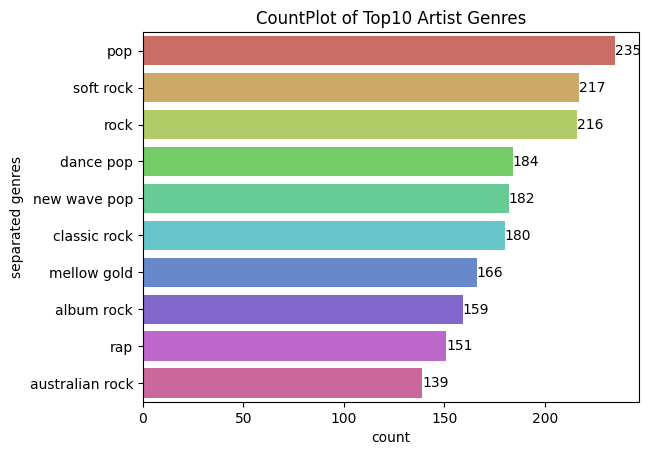

In [29]:
# Plot count plot of artist genres
ag_plot = sb.countplot(y=genretop10["separated genres"], hue=genretop10["separated genres"],
             palette="hls", orient='v', legend=False)
ag_plot.set_title("CountPlot of Top10 Artist Genres")
for i in range(10):
    ag_plot.bar_label(ag_plot.containers[i])

---

##### Let us now look at the relation between <u>**artist genre**</u> and <u>**artist popularity**</u> by itself

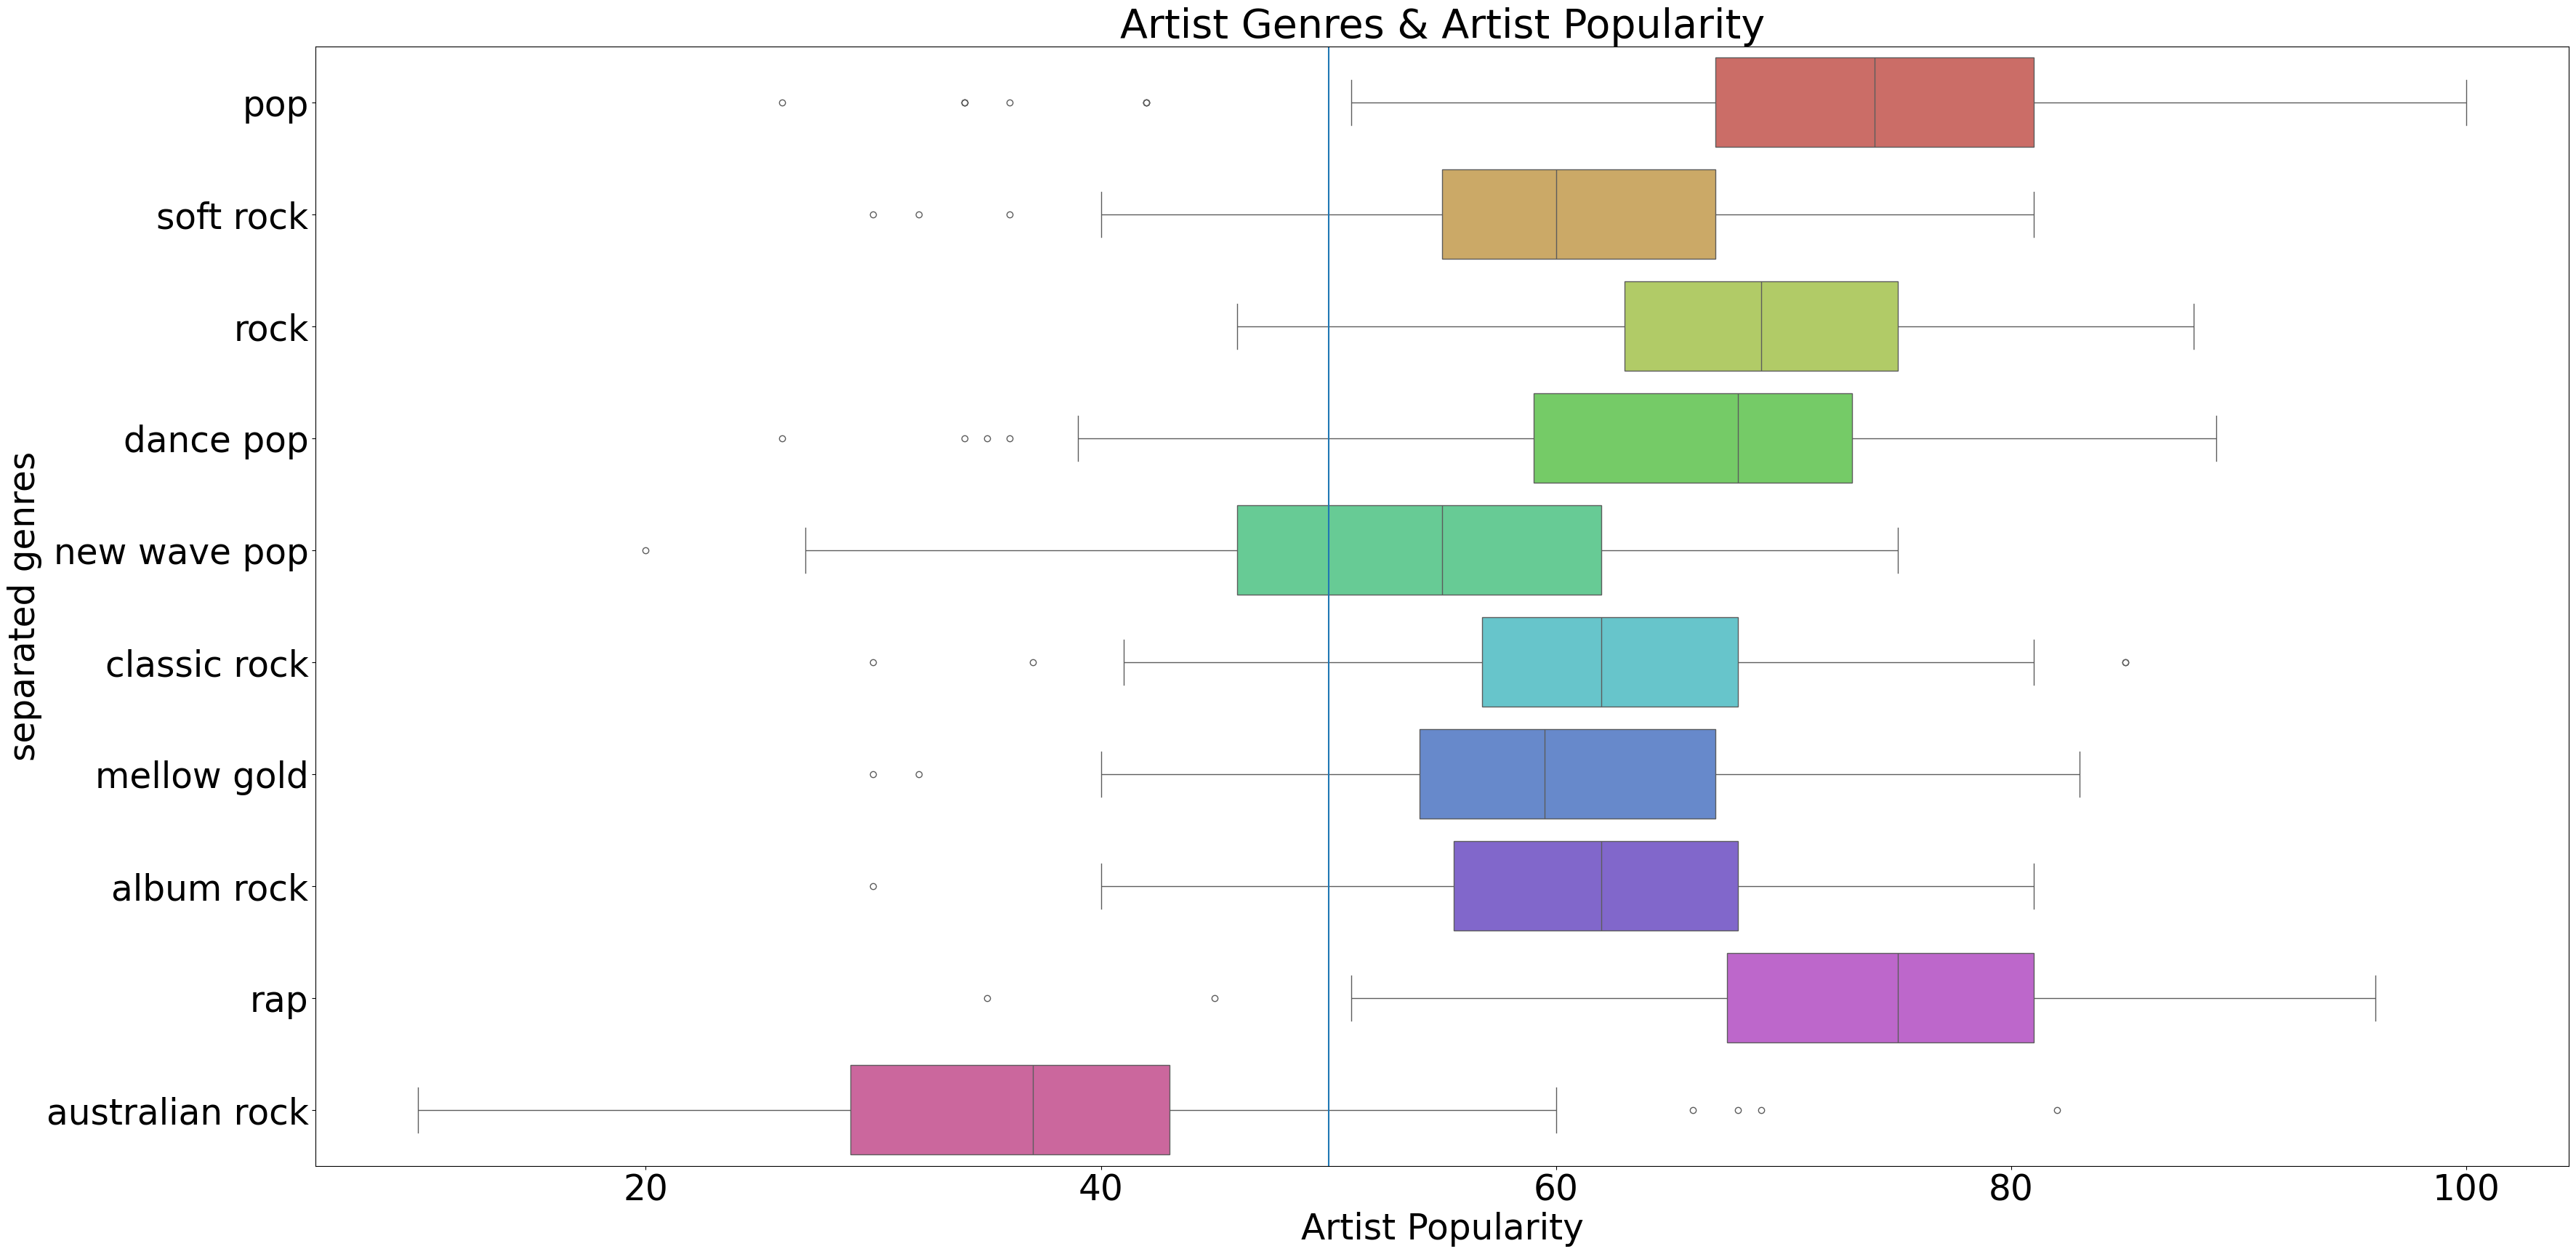

In [30]:
f, ax= plt.subplots(figsize=(40, 20))
sb.boxplot(x="Artist Popularity", y="separated genres", data=genretop10,
           hue="separated genres", palette="hls",
           orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("Artist Popularity",fontsize=35)
ax.set_ylabel("separated genres",fontsize=35)
plt.axvline(50, label= "Artist Popularity = 50")
plt.title("Artist Genres & Artist Popularity", fontdict={'size':40})
plt.show()

<u>**Conclusions from box plot**</u>\
By looking at the plot above, most of the top 10 genres have artist popularities that are above the middle point of 50 (as represented by the vertical blue line), except for australian rock.

There are indeed some differences in the distribution of Artist Popularity of each genre, but how significant is it? And can we conclude that there is a statistical relation between genres and artist popularity?

We will use <u>***Analysis of Variance (ANOVA)***</u> to answer those questions and measure the correlation between genres and track popularity.

In [31]:
#Creating an array of all unique genres
genres = exploded_genres["separated genres"].unique()

#Creating a 2D array, which is an array of arrays of artist popularity for each genre
popularity_lists = [exploded_genres[exploded_genres['separated genres'] == genre]['Artist Popularity'].values for genre in genres]

#Perform One-way ANOVA
f_stat, p_value = f_oneway(*popularity_lists)

#Print the results of ANOVA
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 9.148458568024978, P-value: 0.0


The <u>***F-statistic***</u> is a measure of the ratio of the variance between the groups to the variance within the groups. If the null hypothesis is true (no statistical relation between artist genre and artist popularity), the F-statistic is expected to be close to 1.0. Since our F-statistic is relatively greater than 1.0, it suggests that there are indeed differences in mean artist popularity across different genres.

The <u>***P-value***</u> is simply the percentage of observing an F-statistic as extreme as or more extreme than the one calculated given that the null hypothesis is true. Since the P-value is 0.0, it is virtually impossible for the null hypothesis to be true, thus we can conclude that there is a statistical relation between artist genre and artist popularity.

### **Visualisation of Album Release Decade and Artist Popularity**
##### Let us first look at <u>**album release decade**</u> by itself

In [32]:
decades = pd.DataFrame(genredate[["Decade Released", "Artist Popularity"]])
decades["Decade Released"].value_counts()

Decade Released
2010s    2018
2000s     904
2020s     842
1990s     504
1980s     306
1970s     264
1960s     143
1950s      45
1940s       1
Name: count, dtype: int64

In [33]:
# Order dataframe by decade released count, descending for visualisation
decades["Decade Count"] = decades["Decade Released"].map(decades["Decade Released"].value_counts())
decades = decades.sort_values(by='Decade Count', ascending=False)
decades

,Decade Released,Artist Popularity,Decade Count
4554,2010s,39,2018
5219,2010s,80,2018
5262,2010s,53,2018
13418,2010s,45,2018
5260,2010s,83,2018
...,...,...,...
8267,1950s,61,45
8268,1950s,52,45
8379,1950s,42,45
8270,1950s,49,45


We can now look at the count of each decade in a graph. Most of the songs are from the 21st century, with the song count decreasing as we go further back in time in the 20th century.

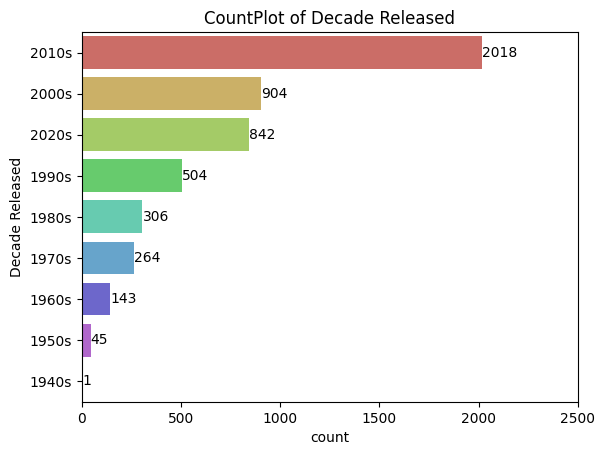

In [34]:
# Plot count plot of artist genres
dr_plot =sb.countplot(y=decades["Decade Released"], hue=decades["Decade Released"],
             palette="hls", orient='v', legend=False)
dr_plot.set_title("CountPlot of Decade Released")
dr_plot.set_xlim(0,2500)
for i in range(9):
    dr_plot.bar_label(dr_plot.containers[i])

---

##### Let us now look at the relation between <u>**album release decade**</u> and <u>**artist popularity**</u> by itself

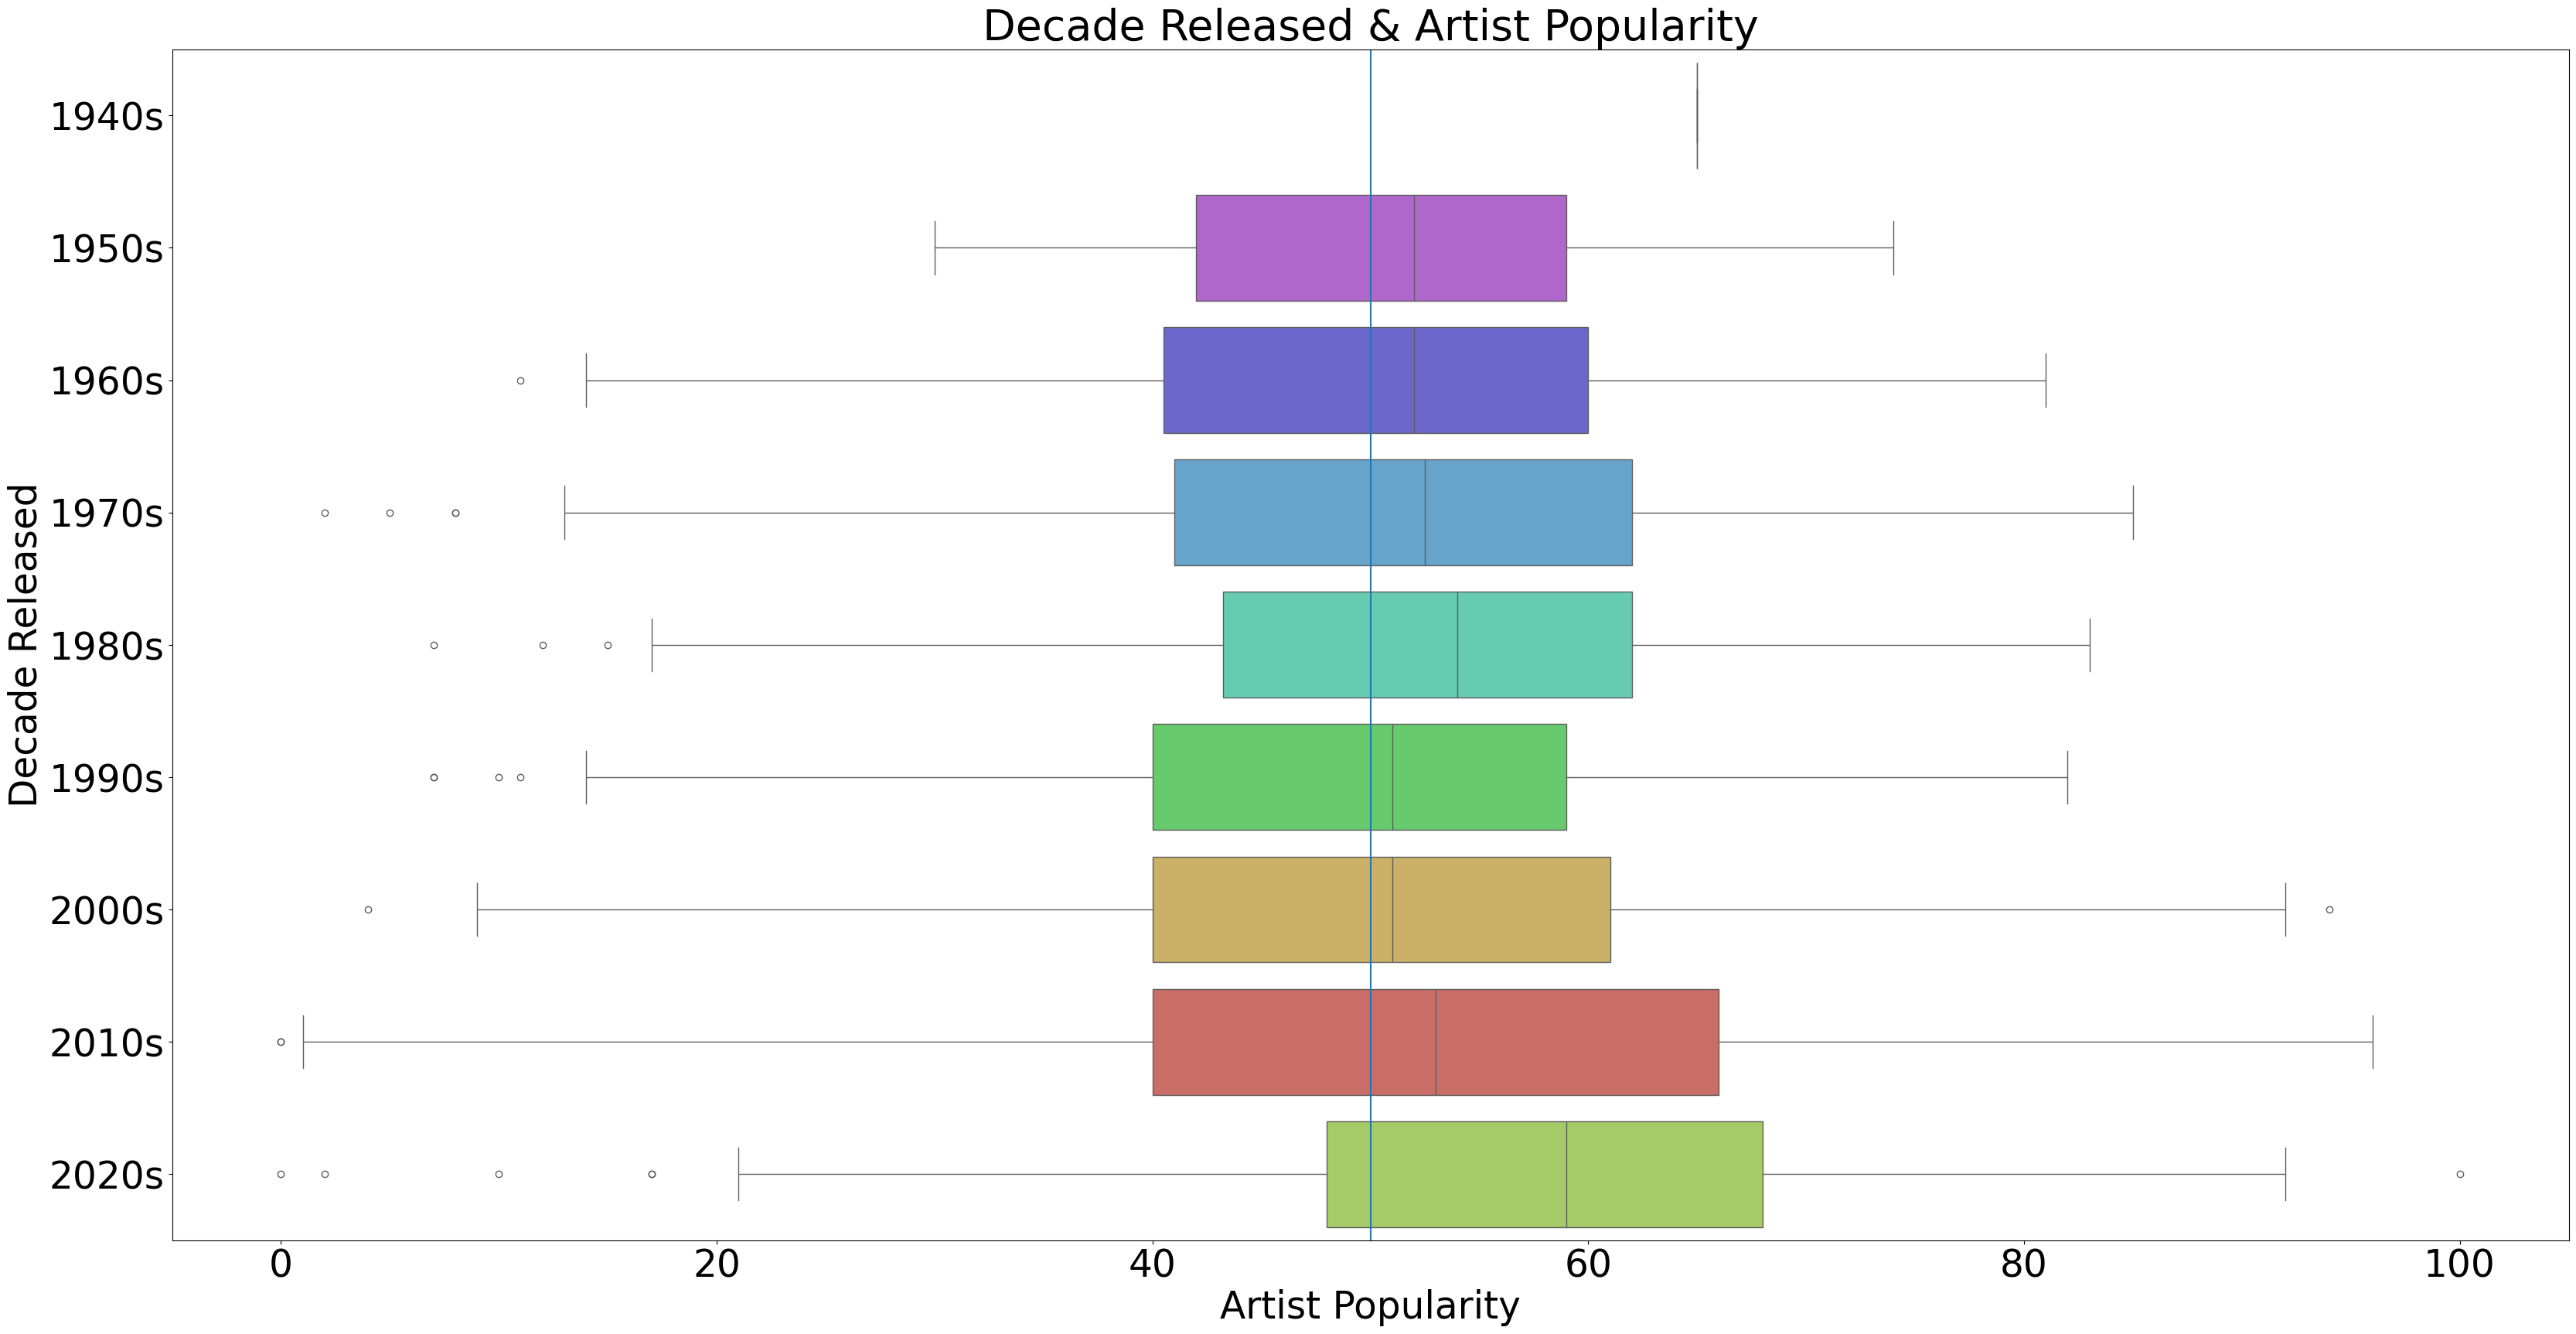

In [35]:
f, ax= plt.subplots(figsize=(40, 20))
sb.boxplot(x="Artist Popularity", y="Decade Released", data=decades,
           hue="Decade Released", palette="hls",
           orient = "h", order=["1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"],
           width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("Artist Popularity",fontsize=35)
ax.set_ylabel("Decade Released",fontsize=35)
plt.axvline(50, label= "Artist Popularity = 50")
plt.title("Decade Released & Artist Popularity", fontdict={'size':40})
plt.show()

<u>**Conclusions from box plot**</u>\
By looking at the plot above, most decades have artist popularities that are around the middle point of 50 (as represented by the vertical blue line).